<br>
<p style="font-size: 45px;
          text-align:center;
          font-family: 'Times New Roman';
          font-variant: small-caps;
          font-weight: bold;
          line-height: 50px;"> Laboratorio II Procesamiento de señales</p>
          
<p style="font-size: 20px;
text-align:center;
font-family: 'Times New Roman';
font-variant: small-caps;
font-weight: italic;
line-height: 50px;">Procesamiento de Señales Biomédicas</p>
<br>
<h1>Descripción del dataset:</h1>



<br>
<div style="text-align: justify;width:80%;margin: 0 auto"> 
Para el desarrollo de este laboratorio se hará uso del dataset "Pulse Transit Time PPG Dataset" en el cuál se presentan diferentes señales biomédicas registradas para diferentes pacientas realizando diferentes activadades. se cuenta con las siguientes señales:
</div>
<br>
<div style="text-align: justify;width:60%;margin: 0 auto"> 
<ul>
        <li> ecg: 3-lead ECG captured at 500Hz
        <li> peaks: CSV ONLY, annotated in WFDB. The annotated ECG R peak (1 = peak, 0 = no peak)
        <li> pleth_1: MAX30101 red wavelength PPG from the distal phalanx (first segment) of the left index finger palmar side (arbitrary units, 500Hz)
        <li> pleth_2: MAX30101 infrared wavelength PPG from the distal phalanx (first segment) of the left index finger palmar side (arbitrary units, 500Hz)
        <li> pleth_3: MAX30101 green wavelength PPG from the distal phalanx (first segment) of the left index finger palmar side (arbitrary units, 500Hz)
        <li> pleth_4: MAX30101 red wavelength PPG from the proximal phalanx (base segment) of the left index finger palmar side (arbitrary units, 500Hz)
        <li> pleth_5: MAX30101 infrared wavelength PPG from the proximal phalanx (base segment) of the left index finger palmar side (arbitrary units, 500Hz)
        <li> pleth_6: MAX30101 green wavelength PPG from the proximal phalanx (base segment) of the left index finger palmar side (arbitrary units, 500Hz)
        <li> lc_1: TAL221 load cell proximal phalanx (first segment) PPG sensor attachment pressure (arbitrary units, 80Hz)
        <li> lc_2: TAL221 load cell (base segment) PPG sensor attachment pressure (arbitrary units, 80Hz)
        <li> temp_1: distal phalanx (first segment) PPG sensor temperature (°C, 10Hz)
        <li> temp_2: proximal phalanx (base segment) PPG sensor temperature in (°C, 10Hz)
        <li> temp_3: InvenSenseMPU-9250 IMU temperature (°C, 500Hz)
        <li> a_x: InvenSenseMPU-9250 IMU acceleration in x-direction (g, 500Hz)
        <li> a_y: InvenSenseMPU-9250 IMU acceleration in y-direction (g, 500Hz)
        <li> a_z: InvenSenseMPU-9250 IMU acceleration in z-direction (g, 500Hz)
        <li> g_x: InvenSenseMPU-9250 IMU angular velocity around x-axis (°/s, 500Hz)
        <li> g_y: InvenSenseMPU-9250 IMU angular velocity around y-axis (°/s, 500Hz)
        <li> g_z: InvenSenseMPU-9250 IMU angular velocity around z-axis (°/s, 500Hz)

</ul>
</div>

Por ejemplo para el sujeto de prueba s1 se presenta la lectura de los datos registrados en la actividad de correr:

In [58]:
from pathlib import Path
import pandas as pd 
from pywt import wavedec
import numpy as np
import scipy.signal as sg
import matplotlib.pyplot as plt
import seaborn as sns

def get_data(subject="s10",activity="run"):
    cwd=Path.cwd()

    DATA_DIR=cwd/"data"

    df=pd.read_csv(DATA_DIR/f"{subject}_{activity}.csv")
    
    return df
df=get_data(subject="s10",activity="run")

In [59]:

def get_wavelet_correlation_modes(x,plot):
    coeffs = wavedec(x, 'db4', level=4)

    coeffs=np.array([sg.resample(coeff,len(coeffs[-1])) for coeff in coeffs])
    corr=coeffs@coeffs.T
    if plot:
        # Create a figure and a grid of subplots
        fig, axs = plt.subplots(6, 1, figsize=(8, 12))  # 5 rows of subplots

        # Plot data on the first subplot
        axs[0].plot(coeffs[0], color='blue')
        axs[0].set_title('C_a')

        # Plot data on the second subplot
        axs[1].plot(coeffs[1], color='red')
        axs[1].set_title('Cd4')

        # Plot data on the third subplot
        axs[2].plot(coeffs[2], color='green')
        axs[2].set_title('Cd3')

        # Plot data on the fourth subplot
        axs[3].plot(coeffs[3], color='orange')
        axs[3].set_title('Cd2')

        # Plot data on the fifth subplot
        axs[4].plot(coeffs[4], color='purple')
        axs[4].set_title('Cd1')

        axs[5] = sns.heatmap(corr, linewidth=0.5,annot=True)
        # Adjust layout to prevent overlapping
        plt.tight_layout()

        # Show the plot
        plt.show()
    return corr

<p style="font-size: 20px;
text-align:center;
font-family: 'Times New Roman';
font-variant: small-caps;
font-weight: italic;
line-height: 50px;">Correlacion Cruzada para dos señales distintas </p>
<br>

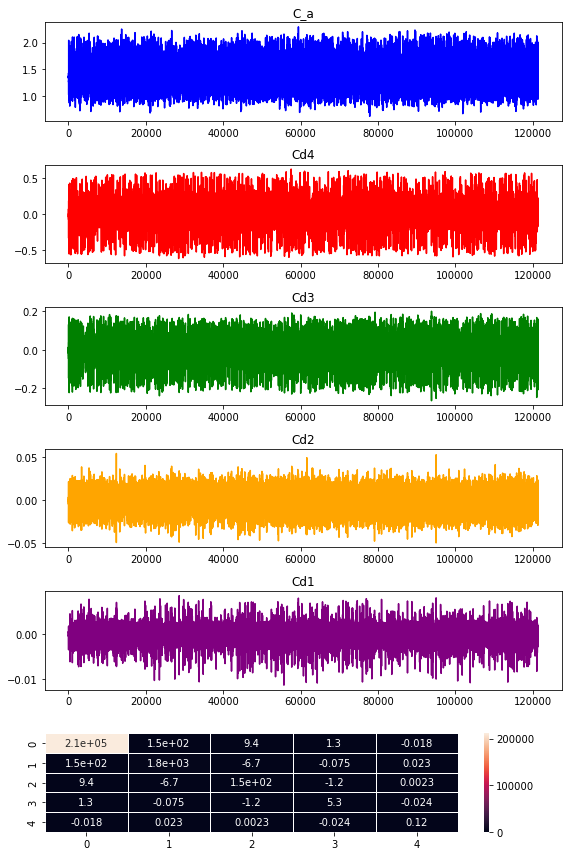

array([[ 2.11274236e+05,  1.45487765e+02,  9.43258786e+00,
         1.27759296e+00, -1.80182146e-02],
       [ 1.45487765e+02,  1.78173790e+03, -6.66220684e+00,
        -7.53395785e-02,  2.29763212e-02],
       [ 9.43258786e+00, -6.66220684e+00,  1.52333512e+02,
        -1.24745947e+00,  2.32218066e-03],
       [ 1.27759296e+00, -7.53395785e-02, -1.24745947e+00,
         5.25096514e+00, -2.38488449e-02],
       [-1.80182146e-02,  2.29763212e-02,  2.32218066e-03,
        -2.38488449e-02,  1.23953168e-01]])

In [60]:
get_wavelet_correlation_modes(df["ecg"]/100_000,plot=True)

In [61]:
corr=get_wavelet_correlation_modes(df["ecg"],plot=False)
np.reshape(corr, -1, order='C').shape

(25,)

In [62]:
df_wcm=pd.read_csv("wcm.csv")

In [63]:
df_wcm

,Unnamed: 0,out,0,1,2,3,4,5,6,7,...,40,41,42,43,44,45,46,47,48,49
0,s1_walk,0,2.179986e+15,1.905237e+12,-2.831943e+10,-7.303060e+09,1.629147e+09,1.905237e+12,1.864201e+13,-7.304170e+10,...,54.281292,-0.600158,16.943849,153.448418,-0.559675,-75.163158,3.766907,3.761390,-0.559675,34.206614
1,s1_run,1,2.179092e+15,1.248652e+12,-1.054884e+10,-1.308035e+09,2.362983e+08,1.248652e+12,8.878139e+12,-2.748327e+10,...,3.630570,1.785354,0.473559,25.727849,-0.265112,45.784504,0.671264,0.043021,-0.265112,12.246175
2,s1_sit,-1,2.207753e+15,2.341106e+12,-9.443643e+10,4.726048e+09,-5.936800e+08,2.341106e+12,1.217801e+13,-2.281836e+10,...,162.738631,-0.110034,-0.086526,13.363207,-0.040033,13.103473,0.011059,0.023274,-0.040033,2.279198
3,s2_walk,0,2.143277e+15,-1.456463e+12,-5.404886e+10,5.849392e+09,-6.123772e+08,-1.456463e+12,1.713866e+13,-1.171165e+09,...,-59.549483,1.825905,-1.033436,13.891925,-0.159253,79.503014,-0.003951,0.099601,-0.159253,4.990381
4,s2_run,1,2.206401e+15,9.383945e+11,1.464615e+10,-1.587223e+10,1.587847e+08,9.383945e+11,2.137980e+13,-2.474058e+10,...,-766.434915,-7.774031,-7.357334,73.454563,0.374393,-175.770850,0.191935,-0.892587,0.374393,52.996952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,s21_run,1,2.105161e+15,1.426268e+12,2.404351e+10,-8.405515e+09,-4.866014e+08,1.426268e+12,1.147170e+13,-3.216342e+10,...,26.241142,-3.975268,0.173408,21.038187,-0.032672,-3.925323,0.407000,-0.202765,-0.032672,15.155745
62,s21_sit,-1,2.129937e+15,9.533869e+11,-3.579324e+10,3.571449e+09,-3.623820e+08,9.533869e+11,1.072879e+13,-2.450205e+10,...,-42.259753,-0.116591,-0.078233,14.588183,-0.027323,-13.780210,-0.033347,-0.021595,-0.027323,2.523502
63,s22_walk,0,2.109000e+15,1.555759e+12,9.543270e+10,-1.431533e+10,2.323891e+09,1.555759e+12,1.822305e+13,-1.589018e+10,...,-42.169864,0.172247,0.578041,10.130864,0.046544,-95.581653,-0.885828,0.436426,0.046544,2.874856
64,s22_run,1,2.133841e+15,1.977316e+12,-4.327015e+10,1.572375e+10,1.845681e+09,1.977316e+12,1.887591e+13,-3.905047e+10,...,-77.569923,-6.000721,-1.591074,21.761365,0.136147,-89.739335,0.565757,-0.182385,0.136147,13.726098


In [64]:
df_y,df_x=df_wcm["out"],df_wcm.iloc[:,2:]
df_y,df_x

(0     0
 1     1
 2    -1
 3     0
 4     1
      ..
 61    1
 62   -1
 63    0
 64    1
 65   -1
 Name: out, Length: 66, dtype: int64,
                0             1             2             3             4  \
 0   2.179986e+15  1.905237e+12 -2.831943e+10 -7.303060e+09  1.629147e+09   
 1   2.179092e+15  1.248652e+12 -1.054884e+10 -1.308035e+09  2.362983e+08   
 2   2.207753e+15  2.341106e+12 -9.443643e+10  4.726048e+09 -5.936800e+08   
 3   2.143277e+15 -1.456463e+12 -5.404886e+10  5.849392e+09 -6.123772e+08   
 4   2.206401e+15  9.383945e+11  1.464615e+10 -1.587223e+10  1.587847e+08   
 ..           ...           ...           ...           ...           ...   
 61  2.105161e+15  1.426268e+12  2.404351e+10 -8.405515e+09 -4.866014e+08   
 62  2.129937e+15  9.533869e+11 -3.579324e+10  3.571449e+09 -3.623820e+08   
 63  2.109000e+15  1.555759e+12  9.543270e+10 -1.431533e+10  2.323891e+09   
 64  2.133841e+15  1.977316e+12 -4.327015e+10  1.572375e+10  1.845681e+09   
 65  2.105667e+1

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_x_t=scaler.fit_transform(df_x)
df_x_t

array([[ 0.593832  ,  0.04873862, -0.05694124, ...,  5.52137311,
        -1.14872672,  1.08196253],
       [ 0.57730003, -0.4180826 ,  0.16980388, ..., -0.01051864,
        -0.48895648, -0.06558618],
       [ 1.10757959,  0.35863396, -0.90056559, ..., -0.03989566,
         0.01518278, -0.58641324],
       ...,
       [-0.7195283 , -0.19973475,  1.52208244, ...,  0.57475788,
         0.20910015, -0.55528699],
       [-0.25992326,  0.09998585, -0.24770596, ..., -0.34585854,
         0.4097958 ,  0.01174764],
       [-0.78118492, -0.11293232,  0.61536783, ..., -0.01731549,
        -0.04448613, -0.5403954 ]])

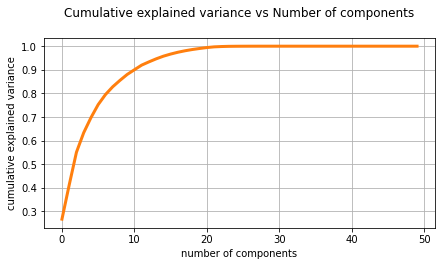

In [66]:
from sklearn.decomposition import PCA
pca = PCA().fit(df_x_t)

plt.figure(figsize=(7, 3.5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color="tab:orange", linewidth=3)
plt.xlabel("number of components")
plt.ylabel("cumulative explained variance")
plt.title("Cumulative explained variance vs Number of components\n")
plt.grid()
plt.show()


In [67]:
df_x_t_pca = PCA(25).fit_transform(df_x_t)
df_x_t_pca

array([[-1.38464314,  1.89239231, -0.10350711, ...,  0.09070762,
         0.04190801,  0.01453688],
       [-0.57953392, -0.00234398, -0.33523538, ..., -0.0974295 ,
        -0.12415931,  0.04762297],
       [-0.98474283, -0.05835338, -1.79196972, ...,  0.10777631,
        -0.2880598 , -0.01489262],
       ...,
       [-0.07531319,  0.22004778, -1.18475068, ..., -0.00585831,
         0.04552227,  0.30458548],
       [ 0.56002963, -0.22487534,  1.15605635, ..., -0.11538858,
         0.1797644 , -0.03134849],
       [ 0.35400895,  0.45224973, -1.53797337, ...,  0.2826652 ,
         0.17144072, -0.01641711]])

In [68]:
y= df_y.values.ravel()
X=df_x_t_pca

In [69]:
from sklearn.svm import SVC

#SVC.fit(df_x_t_pca,y)
from sklearn.pipeline import make_pipeline
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [70]:
y_pred=clf.predict(X)
y,y_pred

(array([ 0,  1, -1,  0,  1, -1,  0,  1, -1,  0,  1, -1,  0,  1, -1,  0,  1,
        -1,  0,  1, -1,  0,  1, -1,  0,  1, -1,  0,  1, -1,  0,  1, -1,  0,
         1, -1,  0,  1, -1,  0,  1, -1,  0,  1, -1,  0,  1, -1,  0,  1, -1,
         0,  1, -1,  0,  1, -1,  0,  1, -1,  0,  1, -1,  0,  1, -1],
       dtype=int64),
 array([ 0,  1, -1,  0,  1, -1,  0,  1, -1,  0,  1, -1,  0,  1, -1,  0,  1,
        -1,  0,  1, -1,  0,  1, -1,  0,  1, -1,  0,  1, -1,  0,  1, -1,  0,
         1, -1,  0,  1, -1,  0,  1, -1,  0,  1, -1,  0,  1, -1,  0,  1, -1,
         0,  1, -1,  0,  1, -1,  0,  1, -1,  0,  1, -1,  0,  1, -1],
       dtype=int64))

In [71]:
from sklearn.metrics import accuracy_score

accuracy_score(y, y_pred)

1.0

In [72]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred)

array([[22,  0,  0],
       [ 0, 22,  0],
       [ 0,  0, 22]], dtype=int64)